In [13]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
import seaborn as sns
import yfinance as yf


In [15]:
stock=input("Enter the code of stock : ")
data=yf.download(stock,"2008-01-01","2021-01-18",auto_adjust=True)
data.head()

Enter the code of stock : NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675


In [16]:
data.shape

(3283, 5)

In [17]:
data.info

<bound method DataFrame.info of              Open   High    Low  Close  Volume
Date                                          
2007-12-31  7.349  7.540  7.283  7.483   27299
2008-01-02  7.572  7.876  7.564  7.850   68553
2008-01-03  7.873  7.980  7.610  7.674   72742
2008-01-04  7.652  7.859  7.500  7.841   61496
2008-01-07  7.803  7.940  7.701  7.879   56675
...           ...    ...    ...    ...     ...
2021-01-11  2.600  2.811  2.589  2.747  177248
2021-01-12  2.794  2.899  2.718  2.753  201432
2021-01-13  2.737  2.826  2.708  2.727  169240
2021-01-14  2.742  2.791  2.660  2.666  163043
2021-01-15  2.672  2.800  2.636  2.737  150994

[3283 rows x 5 columns]>

In [19]:
data.describe()

,Open,High,Low,Close,Volume
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,3.714812,3.788431,3.636149,3.708224,131365.895218
std,1.831245,1.866609,1.790444,1.826208,54415.091229
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691500,2.737000,2.644000,2.693000,91735.000000
50%,3.253000,3.313000,3.184000,3.242000,126609.000000
75%,4.158500,4.245000,4.068000,4.153000,161479.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


Text(0, 0.5, 'NG=F prices series')

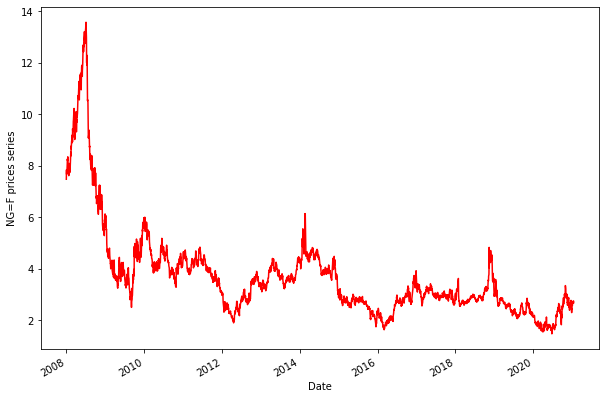

In [24]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} prices".format(stock))
plt.ylabel("{} prices series".format(stock))

C:\Users\Prateek Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

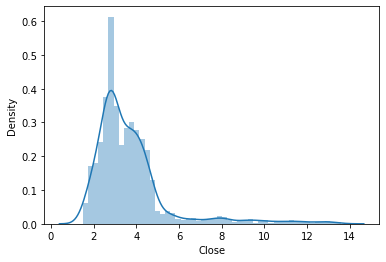

In [25]:
sns.distplot(data["Close"])

C:\Users\Prateek Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

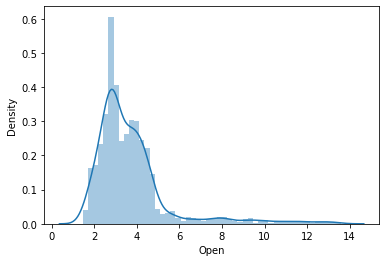

In [26]:
sns.distplot(data["Open"])

C:\Users\Prateek Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

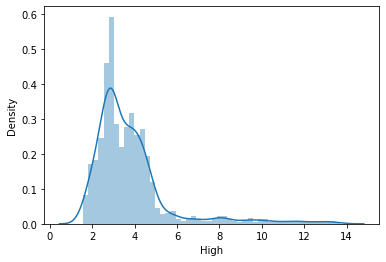

In [27]:
sns.distplot(data["High"])

In [35]:
'''
Conclusions

-Shape of the data
-how data is distributed
-the data is very very non linear

studied - linear , logistic, regularization, svm

'''
X=data.drop("Close",axis=1)
y=data["Close"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2626, 4)
(2626,)
(657, 4)
(657,)


In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [40]:
# MSE ---> mean square error ----> cost func
# RMSE ----> root of MSE
# r2_square ----> 1.0 ---> good model
from sklearn.metrics import mean_squared_error,r2_score
def calculate_metrices(y_test,pred):
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    r2_scor=r2_score(y_test,pred)
    print("mean square error : ",mse)
    print("rmse : ",rmse)
    print("r2_score : ",r2_scor)
calculate_metrices(y_test,pred)
    

mean square error :  0.0013865447236477229
rmse :  0.037236336066371015
r2_score :  0.9994903556172691


In [42]:
from sklearn.linear_model import Lasso,Ridge
la=Lasso().fit(X_train,y_train)
ri=Ridge().fit(X_train,y_train)
la_pred=la.predict(X_test)
ri_pred=ri.predict(X_test)
calculate_metrices(y_test,la_pred)
calculate_metrices(y_test,ri_pred)

mean square error :  0.23080191549056567
rmse :  0.48041847954732725
r2_score :  0.9151654485086915
mean square error :  0.001448547900691029
rmse :  0.03805979375523505
r2_score :  0.9994675654610249


In [49]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr=SVR()
param_grid={"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001],"kernel":['rbf']}
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.071 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.064 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.043 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.063 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.067 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.042 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.080 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   0.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   0.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   0.6s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.008 total time=   0.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.9s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.005 total time=   0.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.9s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.015 total time=   0.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.014 total time=   0.9s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
svr=SVR(C=10,gamma=0.01,kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

In [54]:
import joblib
joblib.dump(ri,'model.pkl')
ridge_from_joblib=model=joblib.load("model.pkl")